# Weiterführende Themen

Wir geben einen kleinen Ausblick auf weitere Packages, die nützlich sein können zum wissenschaftlichen arbeiten mit Python. Natürlich sind die folgenden Themen und Packages nur eine Auswahl. Folgende Themen stellen wir kurz vor:

* Scipy: Eine Projekt zu dem numpy dazugehört, allerdings mehr Funktionalität in richtung Optimierung, Fouriertransformationen und eine größere Liste an Verteilungen für RNG's
* statsmodels: Die Library für Statistik in Python
* Scikit-learn: Die Library die Machine Learning leicht macht
* Tensorflow: Eine weitere Library zum schnellen rechnen mit Arrays mit Fokus auf Deep Learning

### Scipy

Ein Begriff mit zwei Bedeungen im Bezug auf Python: 

1. Eine Sammlung von Libraries als ein Projekt, dazu gehören numpy, pandas, matplotlib und weitere
2. Eine Library selbst, die sich mit wissenschaftlichem Rechnen befasst

Wir Fokussieren uns auf Punkt 2.

In [12]:
# Falls wir an der diskrete Fouriertransformation eines Vektors interessiert sind, 
# so können wir folgenden Code ausführen
import numpy as np
from scipy.fft import fft, ifft

# erstellen eines Beispielhaften Vektors
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5, 1.3, 0.4])

# diskrete Fouriertrafo des Vektors
dft_x = fft(x)

# inverse Fouriertrafo
x_reconstr = ifft(dft_x)

In [13]:
print(dft_x)
print(x_reconstr)

[ 6.2       -0.j          1.53409294+0.12625735j -1.29453374-3.64462849j
  0.16044079+1.50855635j  0.16044079-1.50855635j -1.29453374+3.64462849j
  1.53409294-0.12625735j]
[ 1. +0.j  2. +0.j  1. +0.j -1. +0.j  1.5+0.j  1.3+0.j  0.4+0.j]


In [16]:
# Optimierungsprobleme können mittels dem Modul optimize und den entsprechenden Funktionen gelöst werden.
# Wir betrachten beispielsweise ein allg. Minimierungsproblem, es gibt weitere Algorithmen für 
# Quadratic Programming, lineare Optimirungsprobleme etc.
from scipy.optimize import minimize

def f(x):
    return x[1]**2 + 1/2 * x[0]** 2 * x[1] ** 2 + 3 * x[1] * x[0] - x[0]

# Man kann (und sollte) weitere Ableitungen übebrgeben, hier bin ich aber mal faul 
minimize(f, np.array([1.0,2.2]))

      fun: -0.9999999999999687
 hess_inv: array([[1.19873241, 0.20031597],
       [0.20031597, 0.1992586 ]])
      jac: array([ 2.08616257e-07, -4.47034836e-07])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 11
     njev: 12
   status: 0
  success: True
        x: array([-1.99999985,  0.99999994])

Es existieren weitere Module für BLAS Funktionen, image processing, numerische Integration etc.

### Statsmodels

Statistik mit linearen Modellen etc. Die nutzung ist dabei sehr an die Syntax der `lm()`Funktion aus R angelehnt und der Output ist quasi genauso zu lesen.

In [37]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# lade irgendeinen datensatz als Beispiel
df = sm.datasets.get_rdataset("faithful").data

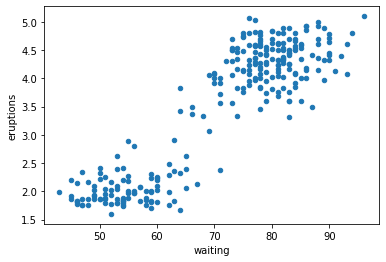

In [48]:
df.plot.scatter(x = 'waiting', y = 'eruptions')

In [64]:
# der logarithmus ist statistisch gesehen nicht notwendig aber verdeutlicht die Anwendung von numpy funktionen
fit = smf.ols('eruptions ~ waiting', data = df).fit()
fit2 = smf.ols('eruptions ~ waiting + np.log(waiting)', data = df).fit()

In [62]:
fit.summary()

/home/felix/.local/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              eruptions   R-squared:                      -9.260
Model:                            OLS   Adj. R-squared:                 -9.260
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 29 Apr 2021   Prob (F-statistic):                nan
Time:                        11:29:23   Log-Likelihood:                -738.05
No. Observations:                 272   AIC:                             1478.
Df Residuals:                     271   BIC:                             1482.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3.217e-83   1.86e-83      1.726      0.086   -4.53e-84    6.89e-83
waiting                  0          0        nan        nan           0           0
np.exp(waiting)  1.267e-41   7.34e-42      1.726      0.086   -1.78e-42    2.71e-41
==============================================================================
Omnibus:                       32.626   Durbin-Watson:                   0.298
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.552
Skew:                          -0.563   Prob(JB):                     2.09e-05
Kurtosis:                       2.205   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [67]:
# Predictions benötigen einen Pandas DataFrame, die Umsetzung ist wie folgt
import pandas as pd

predict_for = pd.DataFrame({'waiting' : np.array([56, 87, 35.5, 45])})
fit.predict(predict_for)

0    2.361149
1    4.705615
2    0.810776
3    1.529242
dtype: float64

Die Umsetzung in PYthon bleibt dabei insgesamt gleich, egal ob man mit generalisierten linearen modellen, generalized least squares, Zeitreihen etc. Arbeitet. 

### Sklearn 

Simple und einfache Nutzung von gängigen Machine Learning Methoden. Folgt ähnlich wie statsmodels immer einer festen Struktur. Dabei wird nur unterschieden zwischen Regression, Klassifikation und Clustering/PCA was die Modelle angeht, sowie weitere Methoden für effiziente Datenvorbereitung bereitgestellt. 

In [68]:
from sklearn import datasets

# The digits dataset
digits = datasets.load_digits()

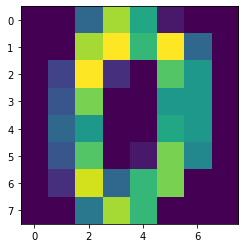

In [86]:
plt.imshow(digits['images'][0])

In [80]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Lade ein paar Classifier 
from sklearn import svm, ensemble, tree

# Es gibt theoretisch weitere tuningparameter, für eine quick and dirty einführung überspringen wir diese
model_svm = svm.SVC()
model_random_forrest = ensemble.RandomForestClassifier()
model_tree = tree.DecisionTreeClassifier()

In [73]:
# We learn the digits on the first half of the digits
model_svm.fit(data[:n_samples // 2], digits.target[:n_samples // 2])
model_random_forrest.fit(data[:n_samples // 2], digits.target[:n_samples // 2])
model_tree.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

DecisionTreeClassifier()

In [77]:
from sklearn import metrics

# wir erstellen die predictions um die performance zu bewerten
expected = digits.target[n_samples // 2:]
predicted = model_svm.predict(data[n_samples // 2:])

# Wir geben uns die Confusion matrix als eine der Standardmetriken für alle Classifier aus
print("Classification report for classifier %s:\n%s\n"
      % (model_svm, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.97      0.97      0.97        91
           2       1.00      0.98      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.93      0.97      0.95        91
           6       0.99      0.99      0.99        91
           7       0.95      0.99      0.97        89
           8       0.92      0.95      0.94        88
           9       0.92      0.96      0.94        92

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  0  0  0  0  0  0  1  2]
 [ 1  0 84  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  1  3]
 [ 0  0  0  0

In [78]:
from sklearn import metrics

# wir erstellen die predictions um die performance zu bewerten
expected = digits.target[n_samples // 2:]
predicted = model_random_forrest.predict(data[n_samples // 2:])

# Wir geben uns die Confusion matrix als eine der Standardmetriken für alle Classifier aus
print("Classification report for classifier %s:\n%s\n"
      % (model_random_forrest, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        88
           1       0.95      0.89      0.92        91
           2       0.95      0.91      0.93        86
           3       0.90      0.85      0.87        91
           4       0.98      0.93      0.96        92
           5       0.91      0.96      0.93        91
           6       0.98      0.99      0.98        91
           7       0.94      0.98      0.96        89
           8       0.89      0.88      0.88        88
           9       0.86      0.95      0.90        92

    accuracy                           0.93       899
   macro avg       0.93      0.93      0.93       899
weighted avg       0.93      0.93      0.93       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 81  0  3  0  1  0  0  0  6]
 [ 1  0 78  4  0  0  0  0  0  3]
 [ 0  0  3 77  0  2  0  3  6  0]
 [ 1  0  0  0 86  1  1  2  

In [79]:
from sklearn import metrics

# wir erstellen die predictions um die performance zu bewerten
expected = digits.target[n_samples // 2:]
predicted = model_tree.predict(data[n_samples // 2:])

# Wir geben uns die Confusion matrix als eine der Standardmetriken für alle Classifier aus
print("Classification report for classifier %s:\n%s\n"
      % (model_tree, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        88
           1       0.77      0.64      0.70        91
           2       0.86      0.71      0.78        86
           3       0.69      0.77      0.73        91
           4       0.90      0.79      0.84        92
           5       0.61      0.75      0.67        91
           6       0.87      0.88      0.87        91
           7       0.87      0.80      0.83        89
           8       0.64      0.62      0.63        88
           9       0.65      0.79      0.71        92

    accuracy                           0.77       899
   macro avg       0.78      0.76      0.77       899
weighted avg       0.78      0.77      0.77       899


Confusion matrix:
[[79  0  0  0  1  4  2  0  1  1]
 [ 0 58  5  7  3  0  0  4  4 10]
 [ 1  5 61 10  0  0  3  0  3  3]
 [ 0  2  2 70  0  3  0  5  6  3]
 [ 6  0  0  0 73  4  3  0  

Für Regression importiert man das entsprechende Objekt `nameOfAlgorithmRegressor()` und geht analog zu dem vorgehen mit den Classifiern for und verwendet statt accuracy usw. metriken wie z.B. MSE, MAE, etc.

### Tensorflow

In [113]:
import tensorflow as tf

In [125]:
t1 = tf.constant(np.arange(0,2, 0.01))

In [126]:
t1

<tf.Tensor: shape=(200,), dtype=float64, numpy=
array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
       1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
   

In [127]:
t2 = tf.reshape(t1, (20,10))

In [128]:
t2.numpy()

array([[0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09],
       [0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19],
       [0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29],
       [0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39],
       [0.4 , 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49],
       [0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59],
       [0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69],
       [0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79],
       [0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89],
       [0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99],
       [1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09],
       [1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19],
       [1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29],
       [1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39],
       [1.4 , 1.41, 1.42, 1.43, 1.

In [129]:
t2[4:8, 3:7]

<tf.Tensor: shape=(4, 4), dtype=float64, numpy=
array([[0.43, 0.44, 0.45, 0.46],
       [0.53, 0.54, 0.55, 0.56],
       [0.63, 0.64, 0.65, 0.66],
       [0.73, 0.74, 0.75, 0.76]])>

In [130]:
# Zufallszahlen fast analog zu numpy via tf.random.verteilungsname
t3 = tf.random.normal((10,30))

In [131]:
t3

<tf.Tensor: shape=(10, 30), dtype=float32, numpy=
array([[ 2.5922964 ,  2.9969175 ,  2.138007  ,  1.0854472 ,  0.14291948,
         0.362793  , -1.3202636 , -0.3083913 , -1.7940445 ,  0.30078918,
         0.55743176, -0.63118356, -0.41747978,  1.5908556 , -1.0324161 ,
        -1.101154  ,  0.08347847,  0.18730709, -0.436149  , -0.55926347,
         0.76740426,  0.52439284,  2.0329206 , -0.30576923,  0.36767063,
        -0.87469524, -1.0522177 , -0.02960121, -2.155303  , -0.11339814],
       [-0.88198245, -0.82148826,  0.07564889, -2.140666  ,  1.1723198 ,
        -0.3528231 , -2.2640772 , -1.6511031 ,  1.6449037 , -0.1592277 ,
        -1.4702775 ,  1.5820211 , -1.1852429 ,  1.6700991 , -0.959636  ,
        -0.6382957 , -2.3058703 , -0.37181288,  1.1191168 ,  1.4173439 ,
         0.15887058, -0.45858777,  1.9044102 , -0.4545062 , -2.2464728 ,
        -0.93225104,  0.8912092 , -0.536885  ,  0.987509  , -1.0645226 ],
       [-0.6057425 , -0.8402748 ,  1.2423592 , -0.05551877,  0.3324425 ,

In [132]:
tf.matmul(t2, t3)

InvalidArgumentError: cannot compute MatMul as input #1(zero-based) was expected to be a double tensor but is a float tensor [Op:MatMul]

In [133]:
# Aufpassen mit den datentypen in tensorflow, an sonsten bleibt alles von der Idee
# wie in numpy
t2 = tf.cast(t2, tf.float32)
tf.matmul(t2, t3)

<tf.Tensor: shape=(20, 30), dtype=float32, numpy=
array([[-1.00604311e-01,  4.18105721e-02, -8.41245651e-02,
        -2.06515476e-01,  2.02154107e-02,  2.57602304e-01,
        -3.61991837e-03, -3.23371887e-01, -1.14650615e-01,
         4.69401777e-02,  3.73324960e-01,  4.54625517e-01,
        -1.89606383e-01,  2.40504235e-01, -9.33526643e-03,
         2.60736734e-01,  1.81955412e-01,  7.87809491e-03,
        -1.18347816e-01,  1.49764167e-02, -1.62592962e-01,
        -4.47882712e-02, -8.55011642e-02,  6.73580691e-02,
         5.49904704e-02, -1.96074069e-01,  4.34890315e-02,
         5.74052148e-03,  1.27596989e-01,  2.36582503e-01],
       [-1.38900578e-01,  3.17117035e-01,  2.31149241e-01,
        -6.23675108e-01,  1.98270783e-01,  6.37910664e-01,
        -1.62939385e-01, -7.66593695e-01, -2.25053981e-01,
         3.91218543e-01,  9.84979153e-01,  1.34231186e+00,
        -6.74539864e-01,  7.86931217e-01, -3.51467818e-01,
         5.20758152e-01,  1.40345514e-01,  2.83083141e-01,
     

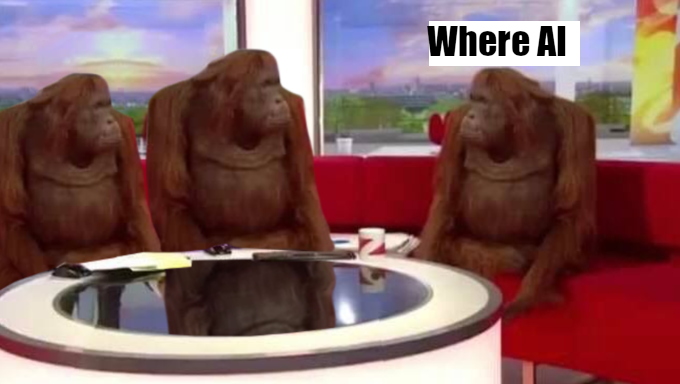

In [134]:
from IPython.display import Image

# WO IST DIE KI ????
Image("../misc/where_AI.png")

In [112]:
# submodul von tensorflow für schnelles erstellen von neuronalen Netzen
from tensorflow import keras

mnist = keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)
model.evaluate(x_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1808 - accuracy: 0.9445
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0773 - accuracy: 0.9763
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0537 - accuracy: 0.9833
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0398 - accuracy: 0.9875
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0315 - accuracy: 0.9898
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0269 - accuracy: 0.9911
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0230 - accuracy: 0.9925
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0198 - accuracy: 0.9937
Epoch 9/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0182 - accuracy: 0.9942
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss

[0.08728741109371185, 0.9819999933242798]